<a href="https://colab.research.google.com/github/sharadv99/capstone-OpioidAddictionRisk/blob/master/Initial_Data_Prep_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
plt.style.use('fivethirtyeight')
%matplotlib inline

In [0]:
#Read in all survey data from 2015-2017
with zipfile.ZipFile("NSDUH-2017-DS0001-bndl-data-tsv.zip") as z:
    data_2017 = pd.read_csv(z.open("NSDUH_2017_Tab.tsv"), sep="\t", low_memory= False)
with zipfile.ZipFile("NSDUH-2016-DS0001-bndl-data-tsv.zip") as z:
    data_2016 = pd.read_csv(z.open("NSDUH_2016_Tab.tsv"), sep="\t", low_memory= False)
with zipfile.ZipFile("NSDUH-2015-DS0001-bndl-data-tsv.zip") as z:
    data_2015 = pd.read_csv(z.open("NSDUH_2015_Tab.tsv"), sep="\t", low_memory= False)

In [0]:
#verify shapes
print(data_2017.shape)
print(data_2016.shape)
print(data_2015.shape) #cols that werent collected in 2016 and 2017 need to be removed

(56276, 2668)
(56897, 2668)
(57146, 2679)


In [0]:
#Based on PUFVariableCrossWalk2017 there are inconsistent column headers - change to match 2017
data_2015.rename(columns={"COLLENRST": 'COLLENRLST', 'COLLENRFT': 'COLLENRLFT'}, inplace=True)

In [0]:
#columns in 2016 that arent in 2017
data_2016.columns.difference(data_2017.columns)

Index(['PNROTNMYR3', 'SEDOTNMYR3', 'STMOTNMYR3', 'TRQOTNMYR3'], dtype='object')

In [0]:
#columns in 2017 that arent in 2016
data_2017.columns.difference(data_2016.columns)

Index(['EDUSCKCOM', 'EDUSCKEST', 'EDUSKPCOM', 'EDUSKPEST'], dtype='object')

In [0]:
#Begin removing inconsistent columns
data_2016.drop(['PNROTNMYR3', 'SEDOTNMYR3', 'STMOTNMYR3', 'TRQOTNMYR3'], axis = 1, inplace= True)
data_2017.drop(['EDUSCKCOM', 'EDUSCKEST', 'EDUSKPCOM', 'EDUSKPEST'], axis = 1, inplace=True)

In [0]:
#merge 2016 and 2017 data
data = pd.concat([data_2017, data_2016], ignore_index= True)

In [0]:
#columns in 2016/2017 that arent in 2015
missing_cols_2015 = data.columns.difference(data_2015.columns)
#columns in 2015 that arent in 2016/2017
extra_cols_2015 = data_2015.columns.difference(data.columns)

In [0]:
#Run only if we want to include 2015 data
data.drop(list(missing_cols_2015), axis = 1, inplace = True)
data_2015.drop(list(extra_cols_2015), axis = 1, inplace = True)

In [0]:
print(data.shape)
print(data_2015.shape)

(113173, 2631)
(57146, 2631)


In [0]:
#merge 2015 and 2016/2017 data
data = pd.concat([data, data_2015], ignore_index= True)
print(data.shape)

(170319, 2631)


In [0]:
data.groupby(['PNRNMREC'])['QUESTID2'].count()

PNRNMREC
1       2531
2       6106
3       9355
8         46
9        122
11         1
83      1181
91    150299
98       678
Name: QUESTID2, dtype: int64

In [0]:
data.groupby(['PNRANYREC'])['QUESTID2'].count()

PNRANYREC
1     53358
2     38889
9       476
83      913
91    76108
98      575
Name: QUESTID2, dtype: int64

In [0]:
dfUsePainMeds = data[data.PNRANYREC==1]
dfUsePainMeds

,AALTMDE,ABODALC,ABODCOC,ABODHER,ABODMRJ,ABPYILANAL,ABPYILLALC,ABUPOSHAL,ABUPOSINH,ABUPOSMTH,...,YUTPOTPP,YUTPSCHL,YUTPSOR,YUTPSTN2,YUTPSTYR,YUTPSUIC,ZALEPDAPYU,ZOHYANYYR2,ZOLPPDAPYU,ZOLPPDPYMU
19,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,99,999,2,99,0,0,0,0
20,0.0,1,0,0,0,0,1,93.0,91.0,91.0,...,99,99,99,999,99,99,0,0,0,0
21,NaN,0,0,0,0,0,0,91.0,93.0,91.0,...,99,99,99,999,99,99,0,0,0,0
23,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,99,999,99,99,0,0,0,0
33,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,99,999,99,99,0,0,0,0
34,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,99,999,99,99,0,0,0,0
36,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,99,999,99,99,0,0,0,0
46,NaN,0,0,0,0,0,0,0.0,93.0,91.0,...,99,99,99,999,99,99,0,0,0,0
50,NaN,0,0,0,0,0,0,91.0,93.0,91.0,...,99,99,99,999,99,99,0,0,0,0
52,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,99,999,2,99,0,0,0,0


In [0]:
#Set MISUSE variable
misuseCodes = [1, 2, 8]
dfUsePainMeds['MISUSE'] = dfUsePainMeds.apply(lambda row:
                                              1 if row.PNRNMREC in misuseCodes else 0,
                                              axis=1)

dfUsePainMeds

/Users/sharadvaradarajan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,AALTMDE,ABODALC,ABODCOC,ABODHER,ABODMRJ,ABPYILANAL,ABPYILLALC,ABUPOSHAL,ABUPOSINH,ABUPOSMTH,...,YUTPSCHL,YUTPSOR,YUTPSTN2,YUTPSTYR,YUTPSUIC,ZALEPDAPYU,ZOHYANYYR2,ZOLPPDAPYU,ZOLPPDPYMU,MISUSE
19,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,999,2,99,0,0,0,0,0
20,0.0,1,0,0,0,0,1,93.0,91.0,91.0,...,99,99,999,99,99,0,0,0,0,0
21,NaN,0,0,0,0,0,0,91.0,93.0,91.0,...,99,99,999,99,99,0,0,0,0,0
23,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,999,99,99,0,0,0,0,0
33,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,999,99,99,0,0,0,0,0
34,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,999,99,99,0,0,0,0,1
36,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,999,99,99,0,0,0,0,0
46,NaN,0,0,0,0,0,0,0.0,93.0,91.0,...,99,99,999,99,99,0,0,0,0,1
50,NaN,0,0,0,0,0,0,91.0,93.0,91.0,...,99,99,999,99,99,0,0,0,0,0
52,NaN,0,0,0,0,0,0,91.0,91.0,91.0,...,99,99,999,2,99,0,0,0,0,0


In [0]:
#Determine classification imbalance
print('COUNT of MISUSE')
print(dfUsePainMeds.groupby(['MISUSE'])['MISUSE'].count())
class_imbal = dfUsePainMeds.groupby(['MISUSE'])['MISUSE'].count()
print('\nPERCENT MISUSE')
print(sum(dfUsePainMeds.MISUSE) / len(dfUsePainMeds))

COUNT of MISUSE
MISUSE
0    44675
1     8683
Name: MISUSE, dtype: int64

PERCENT MISUSE
0.162730986919


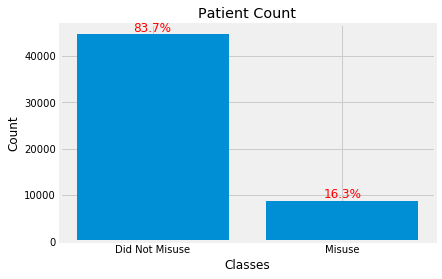

In [0]:
list_of_vals = ["{:0.1f}%".format(100 * class_imbal[0]/len(dfUsePainMeds)),
                "{:0.1f}%".format(100 * class_imbal[1]/len(dfUsePainMeds))]
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.bar([0,1], list(dict(class_imbal).values()))
my_xticks = ['Did Not Misuse','Misuse']
ax.set_xticks([0,1])
ax.set_xticklabels(my_xticks)
ax.set_title("Patient Count")
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
rects = ax.patches
for rect, label in zip(rects, list_of_vals):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize = 12, color = "r")




In [0]:
dep_var_counts = data["PNRNMINIT"].astype("str").value_counts()

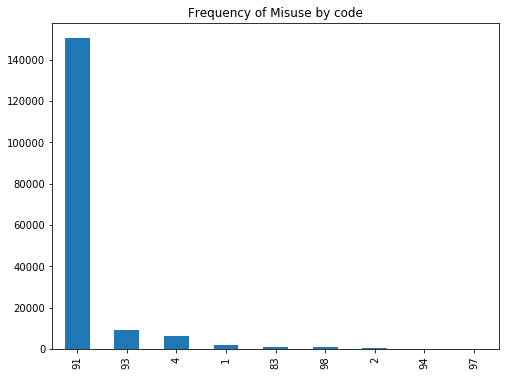

In [0]:
dep_var_counts.plot(kind='bar', figsize = (8,6), title= "Frequency of Misuse by code")

In [0]:
for i,j in list(dep_var_counts.to_dict().items()):
    print("{} makes up {}% of the total".format(i,100*j/sum(list(dep_var_counts.to_dict().values()))))

91 makes up 88.24558622349826% of the total
93 makes up 5.49263440954914% of the total
4 makes up 3.639640909117597% of the total
1 makes up 1.0621246014830994% of the total
83 makes up 0.6934047287736541% of the total
98 makes up 0.4702939777711236% of the total
2 makes up 0.36226140360147724% of the total
94 makes up 0.018201140213364334% of the total
97 makes up 0.015852605992285065% of the total


In [0]:
unique_vals_per_col = data.nunique()

In [0]:
#x = Unique vals in a column   y = Number of cols that share that unique value
freq_counts = pd.Series(list(unique_vals_per_col)).value_counts().to_dict()
freq_counts = sorted(freq_counts.items())
freq_counts

[(2, 728),
 (3, 91),
 (4, 121),
 (5, 106),
 (6, 248),
 (7, 287),
 (8, 202),
 (9, 243),
 (10, 138),
 (11, 68),
 (12, 52),
 (13, 12),
 (14, 12),
 (15, 6),
 (16, 13),
 (17, 5),
 (18, 3),
 (19, 32),
 (20, 5),
 (21, 7),
 (22, 4),
 (23, 4),
 (24, 3),
 (25, 7),
 (26, 1),
 (27, 5),
 (28, 2),
 (29, 5),
 (30, 5),
 (31, 6),
 (32, 8),
 (33, 11),
 (34, 3),
 (35, 10),
 (36, 17),
 (37, 2),
 (38, 6),
 (39, 2),
 (41, 1),
 (43, 1),
 (44, 2),
 (46, 2),
 (47, 2),
 (48, 3),
 (49, 3),
 (50, 2),
 (51, 1),
 (52, 2),
 (53, 1),
 (54, 2),
 (55, 3),
 (56, 3),
 (57, 4),
 (58, 4),
 (59, 6),
 (60, 5),
 (61, 4),
 (62, 5),
 (63, 3),
 (64, 1),
 (65, 6),
 (66, 1),
 (67, 4),
 (68, 2),
 (71, 5),
 (72, 3),
 (74, 2),
 (75, 3),
 (76, 1),
 (77, 3),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (83, 1),
 (86, 1),
 (87, 2),
 (88, 3),
 (89, 3),
 (90, 1),
 (92, 1),
 (93, 1),
 (94, 2),
 (95, 1),
 (96, 1),
 (97, 4),
 (98, 1),
 (102, 1),
 (103, 1),
 (106, 2),
 (109, 1),
 (111, 2),
 (113, 1),
 (114, 1),
 (115, 1),
 (119, 1),
 (120, 1),
 (

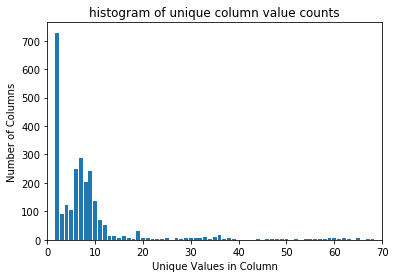

In [0]:
x,y = zip(*freq_counts)
plt.bar(list(x), list(y))
plt.xlim([0,70])
plt.title("histogram of unique column value counts")
plt.xlabel("Unique Values in Column")
plt.ylabel("Number of Columns")